In [1]:
# Ucitavamo tensorflow
import tensorflow as tf
# Ucitavamo keras
from tensorflow import keras

# Pomocne biblioteke
import numpy as np
import matplotlib.pyplot as plt

# Korisno ako koristite tamnu temu, slike ce se bolje videti.
plt.style.use('dark_background')

# Korisno je uvek ostaviti ispisane verzije biblioteka koje su koriscene kako bi
# drugi ljudi imali tu informaciju pri pokretanju vasih sveski.
print(tf.__version__)

2022-11-29 20:31:12.560293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 20:31:12.560319: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Funkcija vraca dva uredjena para kod kojih je prvi element niz
# slika, a drugi element niz labela za slike.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

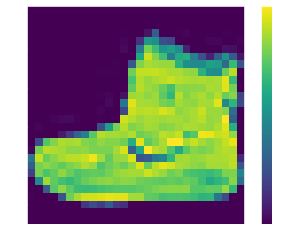

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

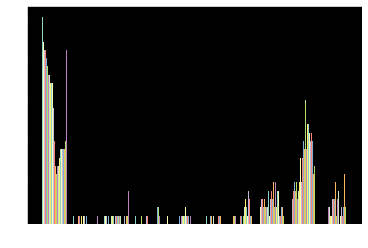

In [12]:
_ = plt.hist(train_images[0])

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

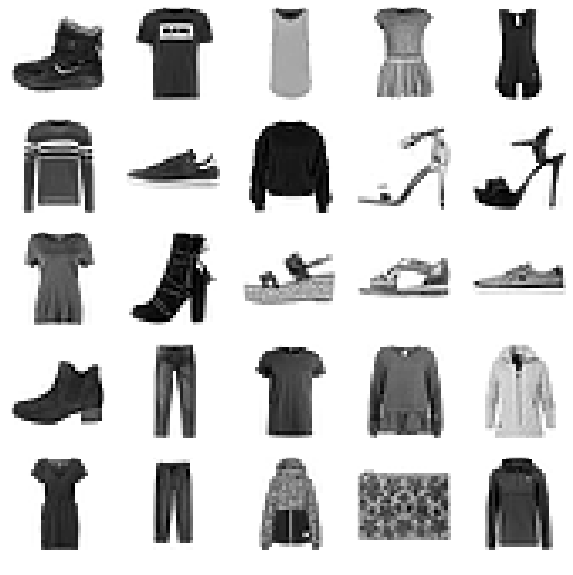

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Kreiranje modela

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2022-11-29 20:34:07.122529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-29 20:34:07.122577: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-29 20:34:07.122613: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hristina-Vostro-3490): /proc/driver/nvidia/version does not exist
2022-11-29 20:34:07.123890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# model.compile(optimizer='adam',
            #   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            #   metrics=['accuracy'])

print(train_labels.shape)
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)
print(train_labels_cat.shape)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

(60000,)
(60000, 10)


Treniranje modela

In [18]:
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10


2022-11-29 20:35:37.184508: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0847 - accuracy: 0.6532
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6382 - accuracy: 0.7706
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5628 - accuracy: 0.7991
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5209 - accuracy: 0.8156
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4925 - accuracy: 0.8262
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8344
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4575 - accuracy: 0.8385
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8433
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4350 - accuracy: 0.8470
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4265 - accurac

Evaluacija tacnosti

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_cat, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4546 - accuracy: 0.8355 - 385ms/epoch - 1ms/step

Test accuracy: 0.8355000019073486


In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 751us/step


In [21]:
predictions[0]

array([8.3416933e-07, 1.2120232e-07, 7.0927049e-06, 7.0771780e-06,
       1.8006849e-05, 1.7721654e-01, 1.7399490e-05, 2.7126715e-01,
       5.0434726e-03, 5.4642242e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
ix = np.argmax(predictions[0])
print(class_names[ix])

Ankle boot


In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

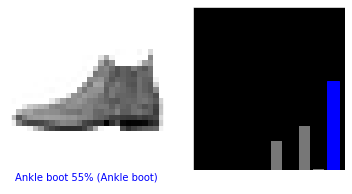

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

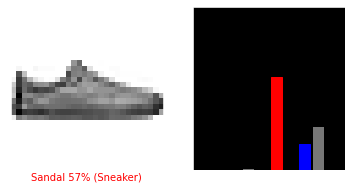

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

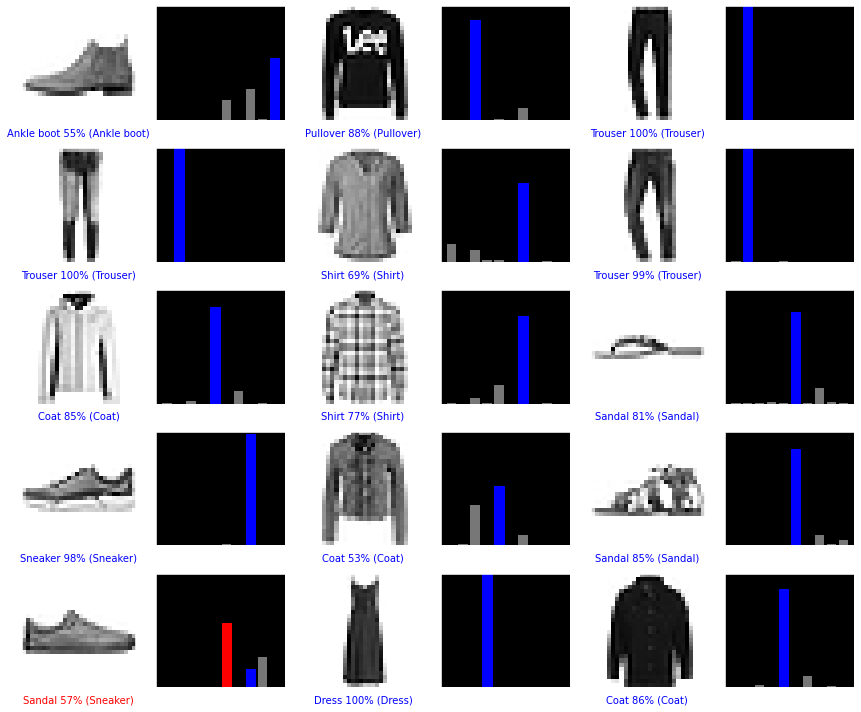

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()